### Types of cross-validation
1. K-fold cross-validation
2. Stratified k-fold cross-validation
3. Hold-out cross-validation
4. Leave-p-out cross-validation
5. Leave-one-out cross-validation
6. Monte Carlo (shuffle-split)
7. Time series (rolling cross-validation)

#### 1. K-fold cross-validation
* In this technique, the whole dataset is partitioned in k parts of equal size and each partition is called a fold. It’s known as k-fold since there are k parts where k can be any integer=3,4,5, etc.

* One fold is used for validation and other K-1 folds are used for training the model. To use every fold as a validation set and other left-outs as a training set, this technique is repeated k times until each fold is used once.

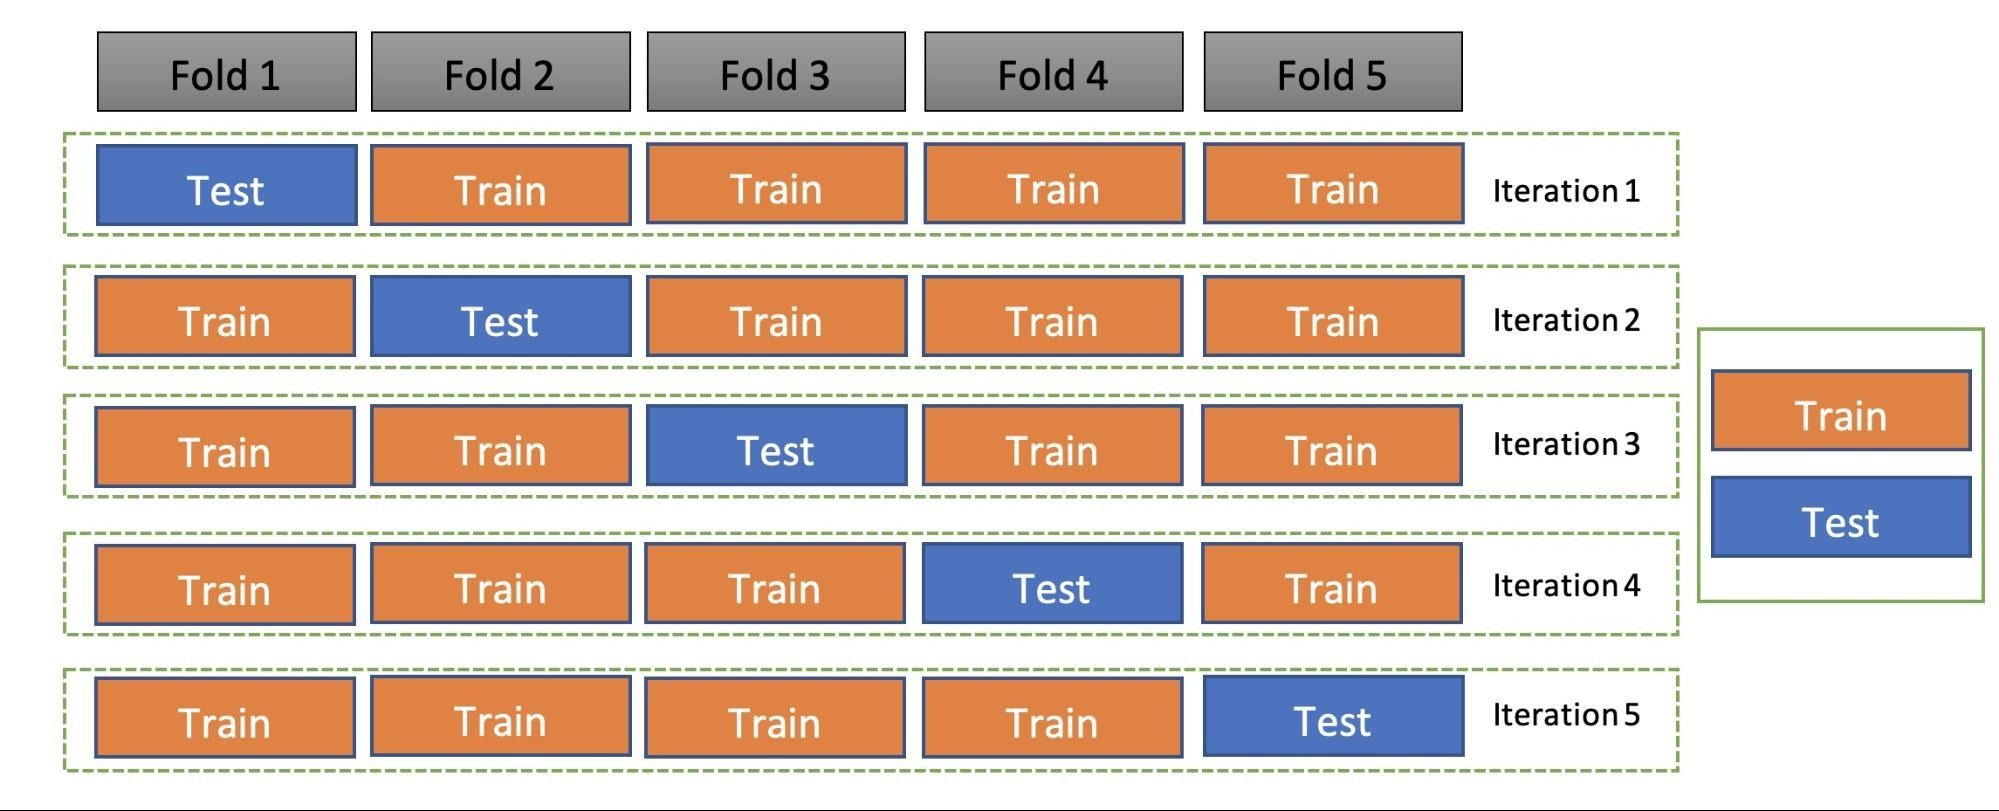

* The image above shows 5 folds and hence, 5 iterations. In each iteration, one fold is the test set/validation set and the other k-1 sets (4 sets) are the train set. To get the final accuracy, you need to take the accuracy of the k-models validation data.

**K-Fold cross validation technique is not considered suitable for imbalanced datasets as the model will not get trained properly owing to the proper ratio of each class's data**

In [23]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.datasets import load_iris
iris=load_iris()
print(iris.data)
print(iris.target)
print(iris.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [15]:
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()
                

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
X=df.values
y=iris.target

In [37]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
k_fold=KFold(n_splits=5)
score=cross_val_score(lr,X,y,cv=k_fold)
print("Cross Validation Score: ", score)
print("Average Cross Validation Score: ", np.mean(score))

Cross Validation Score:  [1.         1.         0.86666667 0.93333333 0.83333333]
Average Cross Validation Score:  0.9266666666666665


#### 2. Stratified k-fold cross-validation
* k-fold validation can’t be used for imbalanced datasets because data is split into k-folds with a uniform probability distribution.
* Stratified k-fold splits the dataset into k equal folds, each fold has the same ratio of instances of target variables that are in the complete dataset. This enables it to work perfectly for imbalanced datasets.

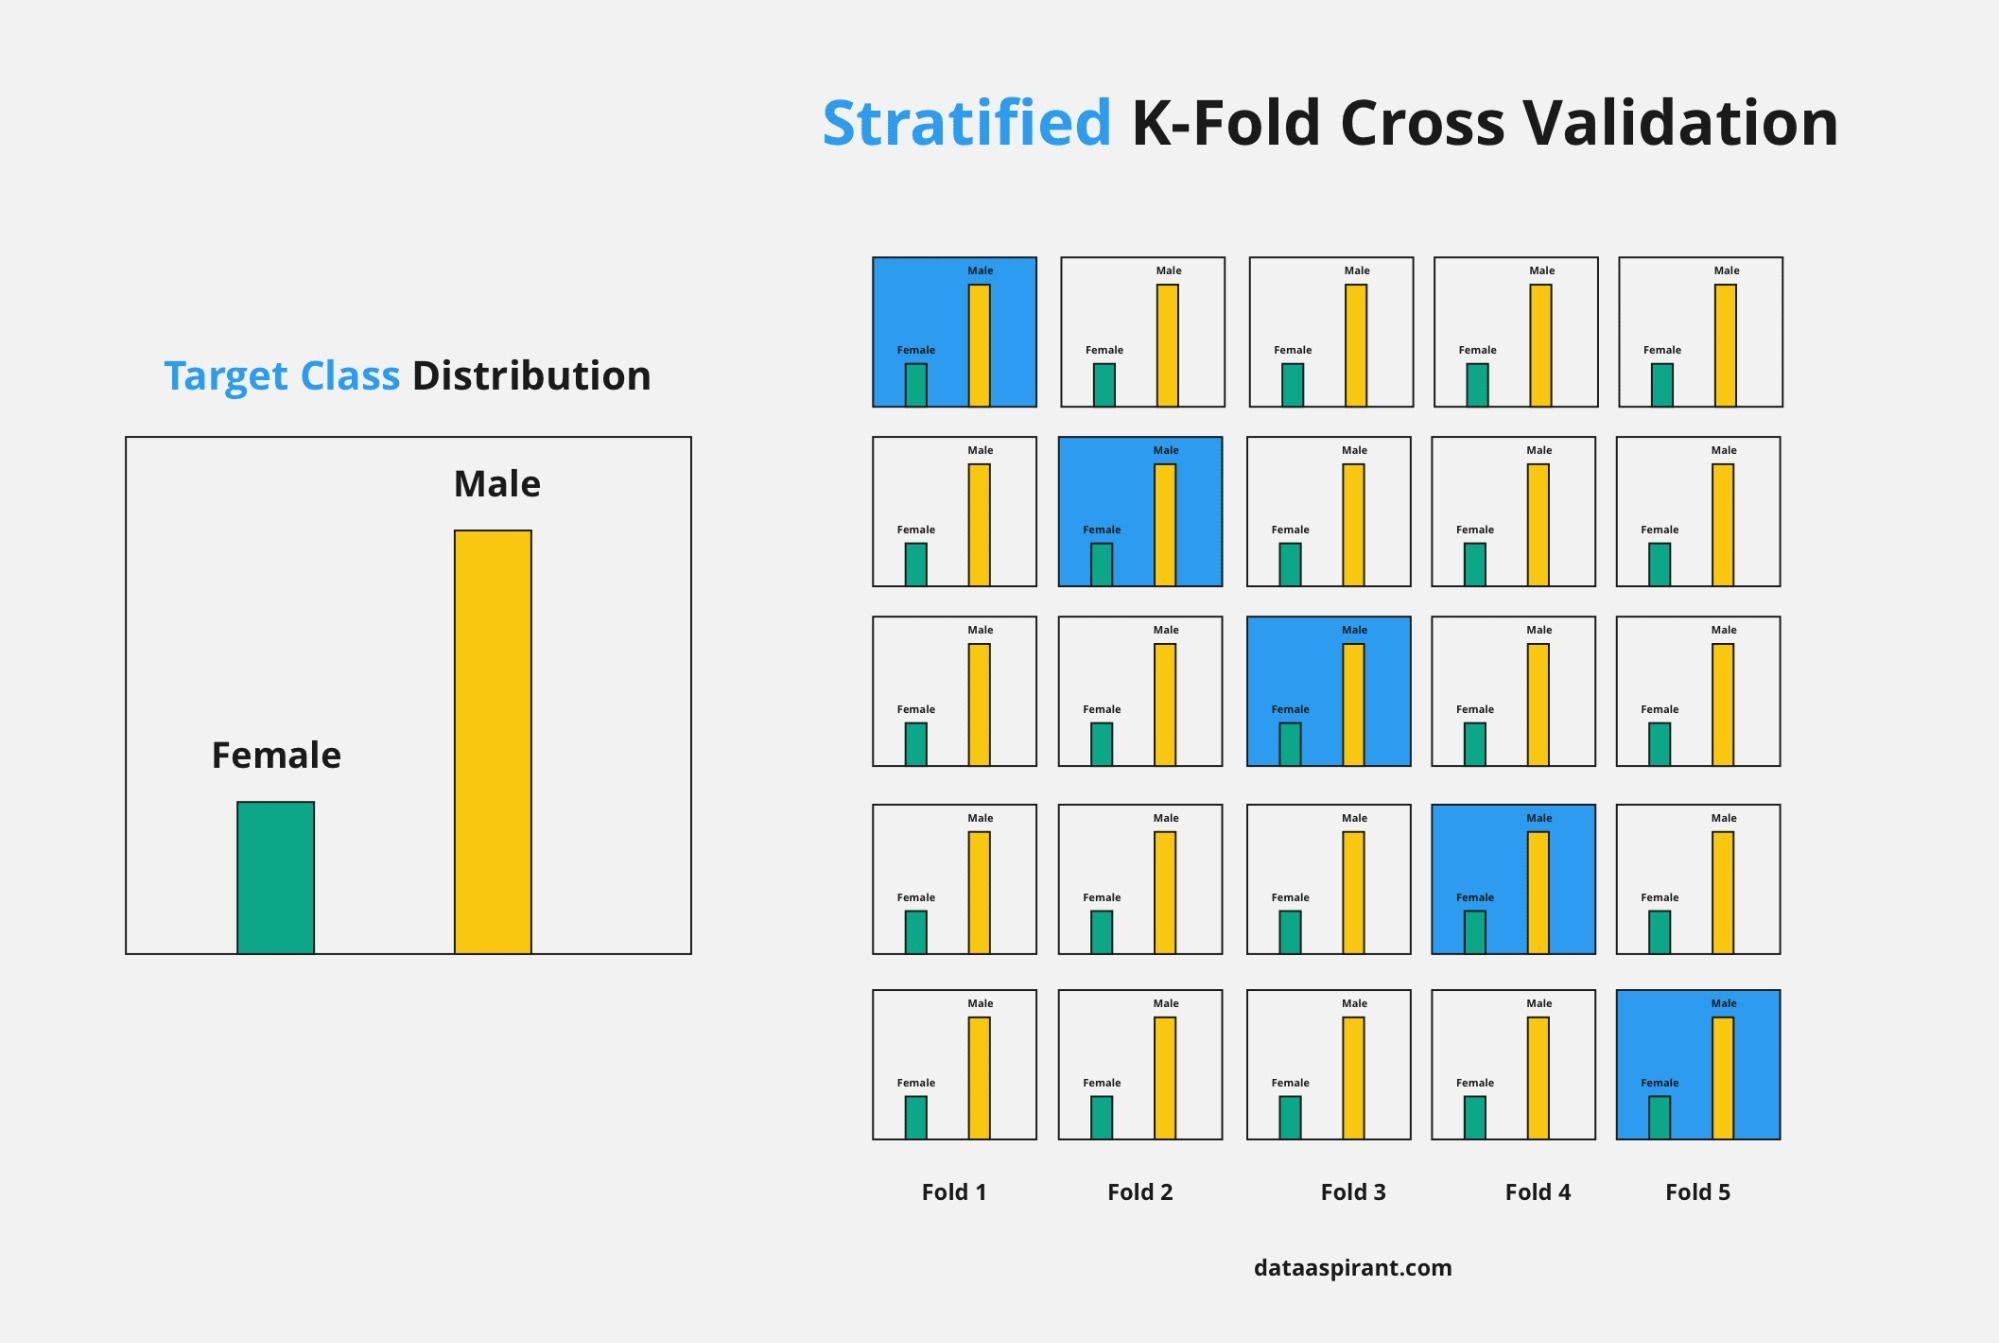

* In the example above, the original dataset contains females that are a lot less than males, so this target variable distribution is imbalanced. In the stratified k-fold cross-validation technique, this ratio of instances of the target variable is maintained in all the folds.

In [34]:
from sklearn.model_selection import StratifiedKFold
lr=LogisticRegression()
st_kf=StratifiedKFold(n_splits=5)
score=cross_val_score(lr,X,y, cv=st_kf)
print("Cross Validation Score: ", score)
print("Average Cross Validation Score: ", np.mean(score))

Cross Validation Score:  [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average Cross Validation Score:  0.9733333333333334


#### 3. Holdout cross-validation (train-test split)
* Holdout cross-validation has the entire dataset partitioned randomly into a training set and a validation set. 
* A rule of thumb to partition data is that nearly 70% of the whole dataset will be used as a training set and the remaining 30% will be used as a validation set.
* Since the dataset is split into only two sets, the model is built just one time on the training set and executed faster.

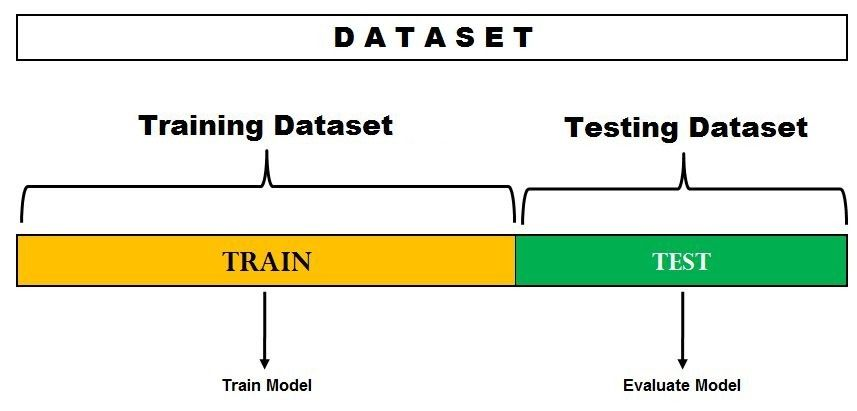

* In the image above, the dataset is split into a training set and a test set.
* You can train the model on the training set and test it on the testing dataset.
* If you want to hyper-tune your parameters or want to select the best model, you can make a validation set like the one below.

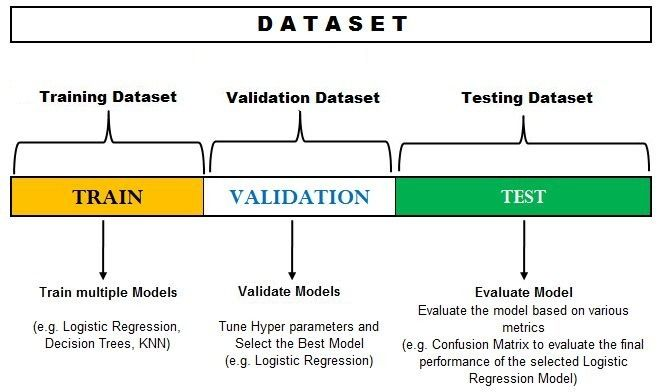

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=40)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Prediction Accuracy:", accuracy_score(y_pred,y_test))

Prediction Accuracy: 1.0


#### 4. Leave-p-out cross-validation
* An exhaustive cross-validation technique, p samples are used as the validation set and n-p samples are used as the training set if a dataset has n samples.
* The process is repeated until the entire dataset containing n samples gets divided on the validation set of p samples and the training set of n-p samples. This continues till all samples are used as a validation set.

**The technique, which has a high computation time, produces good results. However, it’s not considered ideal for an imbalanced dataset and is deemed to be a computationally unfeasible method. This is because if the training set has all samples of one class, the model will not be able to properly generalize and will become biased to either of the classes.**

In [47]:
from sklearn.model_selection import LeavePOut
from sklearn.ensemble import RandomForestClassifier

lpo=LeavePOut(p=1)
lpo.get_n_splits(X)
rf=RandomForestClassifier(n_estimators=5, max_depth=3,n_jobs=1)
score=cross_val_score(rf,X,y,cv=lpo)
print("Cross Validation Score: ", score)
print("Average Cross Validation Score: ", np.mean(score))

Cross Validation Score:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average Cross Validation Score:  0.9333333333333333


#### 5. Leave-one-out cross-validation
* Only 1 sample point is used as a validation set and the remaining n-1 samples are used in the training set.

* There are 1000 instances in your dataset. In each iteration, 1 instance will be used for the validation set and the remaining 999 instances will be used as the training set. The process repeats itself until every instance from the dataset is used as a validation sample.

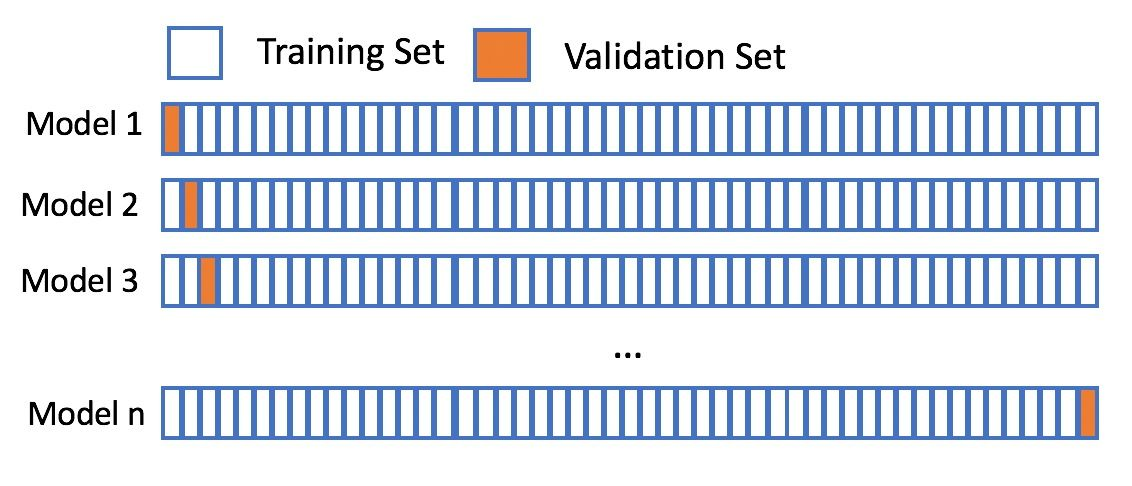

**The leave-one-out cross-validation method is computationally expensive to perform and shouldn’t be used with very large datasets. It also provides a reliable and unbiased estimate for your model performance.**

In [48]:
from sklearn.model_selection import LeaveOneOut
l1o=LeaveOneOut()
rf=RandomForestClassifier(n_estimators=7,max_depth=4,n_jobs=-1)
score=cross_val_score(rf,X,y,cv=l1o)
print("Cross Validation Score: ", score)
print("Average Cross Validation Score: ", np.mean(score))

Cross Validation Score:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average Cross Validation Score:  0.9533333333333334


#### 6. Monte Carlo cross-validation(shuffle split cross-validation and repeated random subsampling cross-validation)
* The Monte Carlo technique involves splitting the whole data into training data and test data. Splitting can be done in the percentage of 70-30% or 60-40% etc.
* The only condition for each iteration is to keep the train-test split percentage different.
* The next step is to fit the model on the train data set in that iteration and calculate the accuracy of the fitted model on the test dataset.
* Repeat these iterations many times - 100,400,500 and higher - and take the average of all the test errors to conclude how well your model performs.
* For a 100 iteration run, the model training will look like this:

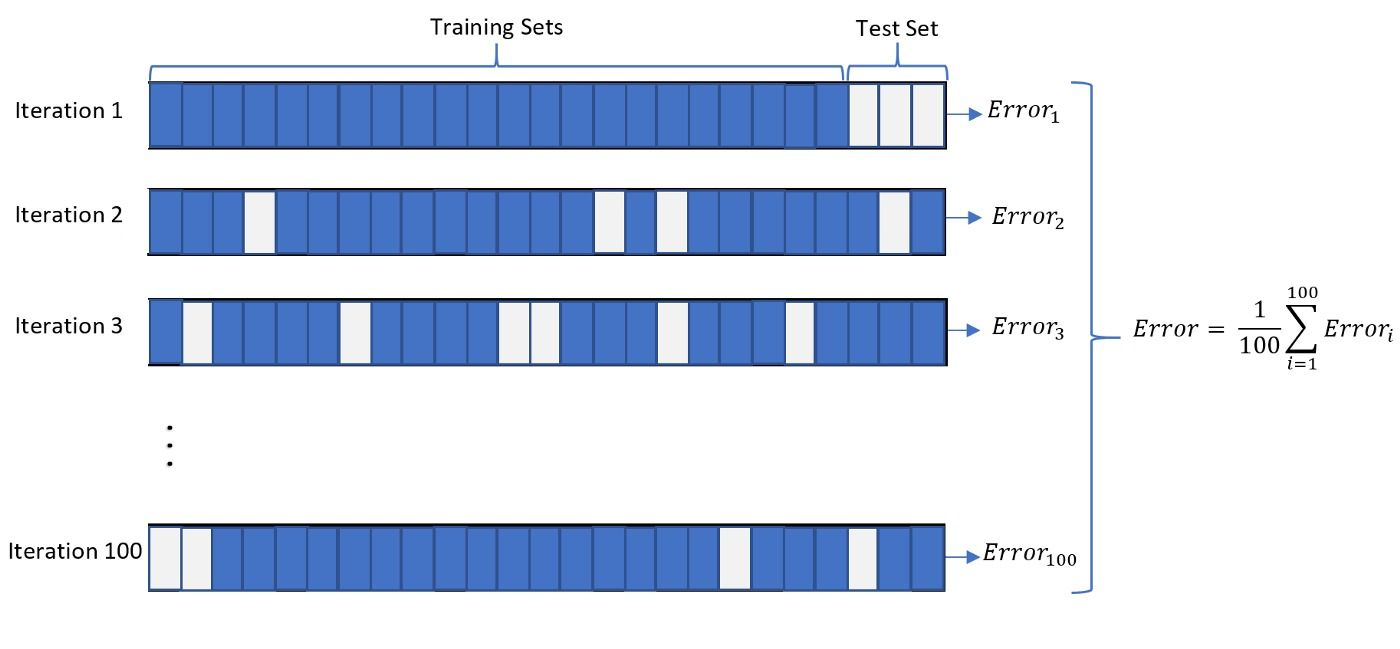

* You can see that in each iteration, the split ratio of the training set and test set is different. The average has been taken to get the test errors.

In [53]:
from sklearn.model_selection import ShuffleSplit
lr=LogisticRegression()
sh_sp=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=6)
score=cross_val_score(lr,X,y,cv=sh_sp)
print("Cross Validation Score: ", score)
print("Average Cross Validation Score: ", np.mean(score))

Cross Validation Score:  [0.95555556 0.95555556 0.86666667 0.91111111 0.95555556 0.97777778]
Average Cross Validation Score:  0.937037037037037


#### 7. Time series (rolling cross-validation / forward chaining method)
* We can’t choose data instances randomly and assign them the test set or the train set. Hence, this technique is used to perform cross-validation on time series data with time as the important factor.
* Since the order of data is very important for time series-related problems, the dataset is split into training and validation sets according to time.


To begin:
Start the training with a small subset of data. Perform forecasting for the later data points and check their accuracy. The forecasted data points are then included as part of the next training dataset and the next data points are forecasted. The process goes on.

The image below shows the method.


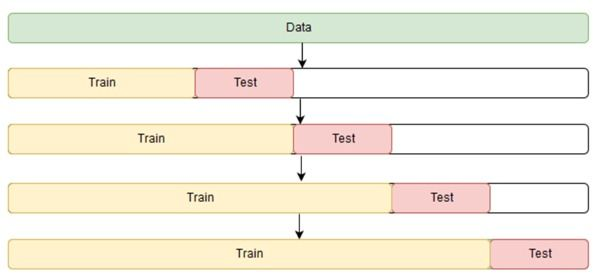

In [56]:
from sklearn.model_selection import TimeSeriesSplit
X=np.array([[1,2],[3,4],[1,2],[3,4],[1,2],[3,4],[1,1],[2,2]])
y=np.array([1,2,3,4,5,6,7,8])
ts=TimeSeriesSplit(n_splits=7)
print(ts)

i=1
for train_index,test_index in ts.split(X):
    print(f"TRAIN {i}:", train_index, "TEST:", test_index)
    X_train, X_test=X[train_index],X[test_index]
    y_train, y_test=y[train_index],y[test_index]
    i+=1

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=7, test_size=None)
TRAIN 1: [0] TEST: [1]
TRAIN 2: [0 1] TEST: [2]
TRAIN 3: [0 1 2] TEST: [3]
TRAIN 4: [0 1 2 3] TEST: [4]
TRAIN 5: [0 1 2 3 4] TEST: [5]
TRAIN 6: [0 1 2 3 4 5] TEST: [6]
TRAIN 7: [0 1 2 3 4 5 6] TEST: [7]
